<div align="center" style="font-size:30px;">
    <strong>📌 Reddit Mental Health Discussion Analysis - Text Mining Project</strong>
</div>

<div align="center">
    <strong>Reikhan Gurbanova(468193)</strong>
</div>


# 1. Introduction

## 1.1 Purpose of the Project
The purpose of this project is to analyze discussions from Reddit mental health communities using text mining and NLP techniques. The study aims to identify frequent topics, sentiment trends, and engagement patterns across multiple subreddits.

### Key Objectives:

**Topic Discovery**: Identifying dominant discussion themes in mental health-related subreddits.

**Sentiment Analysis**: Understanding emotional patterns in user-generated content.

**Engagement Trends**: Examining how sentiment correlates with upvotes and comments.

**Temporal Insights**: Investigating how discussions evolve over time.




## 1.2 Main Assumptions

### **Hypothesis 1**: Posts with high engagement (upvotes & comments) reflect key concerns and widely shared experiences in mental health discussions.

### **Hypothesis 2**: Sentiment analysis will reveal a strong correlation between negative emotions and user engagement, where highly emotional posts receive more responses.



# 2. Dataset

## 2.1 DATA COLLECTION METHOD
The dataset was collected using the Reddit API (PRAW - Python Reddit API Wrapper). The API allows programmatic access to Reddit’s vast data sources, enabling real-time and historical post extraction.

### PROCESS:

**Used PRAW (Python Reddit API Wrapper) to scrape posts from multiple subreddits.**

**Collected 500 posts per subreddit using the .hot() function, which retrieves the most upvoted and engaged posts.**

**Extracted relevant metadata such as post title, content, upvotes, comments, timestamp, and author information.**


## 2.2 DESCRIPTION OF THE DATASET

This dataset consists of Reddit posts from multiple mental health-related subreddits, including:

r/depression

r/mentalhealth

r/suicidewatch

r/anxiety

r/offmychest

## General Dataset Overview:

### Total Posts Collected: 2,500 (500 per subreddit)
### Time Range: [Specify the time period]


## Columns Collected:
### Title: The main content of the post.
### Selftext: Additional details provided by the user.
### Upvotes: Number of upvotes received.
### Comments: Number of user interactions.
### Timestamp: Date and time when the post was created.
### Author: Reddit user who made the post.

## Common Observations:

Majority of the posts have short titles, often without detailed selftext.

Highly upvoted posts contain emotional expressions or personal experiences.


## 2.2 Data Preparation for Modeling
To enhance the quality of analysis, the following preprocessing steps were applied:

✅ Text Cleaning – Removing URLs, special characters, and emojis.

✅ Tokenization – Splitting text into meaningful units (words, phrases).

✅ Stopword Removal – Filtering out frequently used, uninformative words.

✅ Lemmatization – Converting words to their root forms (e.g., "running" → "run").

✅ Feature Engineering – Applying TF-IDF and Word2Vec representations.


In [146]:
import praw
import csv
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel, pipeline
from bertopic import BERTopic
import openai
from bertopic.backend import OpenAIBackend
from textblob import TextBlob
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

In [147]:
import os

print("Current Working Directory:", os.getcwd())
print("Files in directory:", os.listdir())


Current Working Directory: /Users/reyhanqurbanova/Desktop
Files in directory: ['env.txt', '31.01.py', 'Screenshot 2024-12-16 at 11.08.30.png', 'Screen Recording 2025-01-23 at 14.30.16.mov', 'Markdown.Rmd', 'figure 222222.png', 'Screenshot 2024-12-15 at 17.40.22.png', '.Rhistory', 'Screenshot 2025-01-16 at 15.39.04.png', 'Algorithms ', 'movieRecommendation', 'Screenshot 2024-12-15 at 17.24.16.png', 'reddit_data.csv', 'Bonus task.ipynb', 'text mining with openai.py', 'Screenshot 2025-01-26 at 00.15.35.png', 'ml4.py', 'electric-power-consumption-data-set.zip', '76.png', '89.png', 'Screenshot 2024-12-10 at 12.26.10.png', 'Screenshot 2025-01-14 at 12.24.10.png', 'reyhan2 text mining.py', 'Screenshot 2024-12-10 at 12.26.06.png', 'Screenshot 2025-01-31 at 23.34.36.png', 'Screenshot 2025-01-31 at 20.31.32.png', 'Screenshot 2025-01-24 at 20.12.40.png', 'Screenshot 2025-01-23 at 14.30.52.png', 'Screenshot 2024-12-04 at 12.15.28.png', 'task2.4.ipynb', 'figure111.png', 'Screenshot 2024-12-16 at 14

In [148]:
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()

# Debugging: Check if the variables are loaded
print("Client ID:", os.getenv("CLIENT_ID"))
print("Client Secret:", os.getenv("CLIENT_SECRET"))
print("User Agent:", os.getenv("USER_AGENT"))

import praw

# Initialize PRAW Reddit instance
reddit = praw.Reddit(
    client_id=os.getenv("CLIENT_ID"),
    client_secret=os.getenv("CLIENT_SECRET"),
    user_agent=os.getenv("USER_AGENT")
)



Python-dotenv could not parse statement starting at line 1
Python-dotenv could not parse statement starting at line 2
Python-dotenv could not parse statement starting at line 3
Python-dotenv could not parse statement starting at line 5
Python-dotenv could not parse statement starting at line 6
Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8
Python-dotenv could not parse statement starting at line 9
Python-dotenv could not parse statement starting at line 10
Python-dotenv could not parse statement starting at line 11
Python-dotenv could not parse statement starting at line 12
Python-dotenv could not parse statement starting at line 13
Python-dotenv could not parse statement starting at line 14
Python-dotenv could not parse statement starting at line 15
Python-dotenv could not parse statement starting at line 16
Python-dotenv could not parse statement starting at line 17
Python-dotenv could not parse statement starting

Client ID: KBO6YVDjgYLR9Yex90XK3A
Client Secret: aprFOMEHTahJy5bqK_YtCzIdnEdZ0w
User Agent: ConversationSame9571_script_v1.0


In [149]:
subreddits = ["depression", "mentalhealth", "suicidewatch", "anxiety", "offmychest"]


In [150]:
# File to save the combined data
filename = "january_reddit_posts.csv"

In [151]:
# Fetch and combine data from multiple subreddits
all_posts = []
for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)
    for submission in subreddit.hot(limit=500):  # Fetch top 500 posts from each subreddit
        all_posts.append([
            subreddit_name,
            submission.id,
            submission.title,
            submission.selftext,
            submission.score,
            datetime.fromtimestamp(submission.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
            submission.num_comments,
            submission.upvote_ratio,
            str(submission.author)
        ])

In [152]:
import os
import csv  # Import the CSV module to handle file writing

# Define the file path where the CSV will be saved (Desktop in this case)
filename = os.path.expanduser("~/Desktop/january_reddit_posts.csv")

# Open the file in write mode ("w"), ensuring UTF-8 encoding to handle special characters
with open(filename, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)  # Create a CSV writer object
    
    # Write the header row to define the column names in the CSV file
    writer.writerow([
        "Subreddit", "Post ID", "Title", "Selftext", "Score",
        "Created Date", "Comments", "Upvote Ratio", "Author"
    ])
    
    # Write all the collected Reddit posts data to the file
    writer.writerows(all_posts)

# Print a confirmation message with the file path
print(f"Combined data saved to {filename}")


Combined data saved to /Users/reyhanqurbanova/Desktop/january_reddit_posts.csv


In [153]:
# Load the dataset
file_path = "/Users/reyhanqurbanova/Desktop/january_reddit_posts.csv"  # Replace with your dataset path
df = pd.read_csv(file_path)

# Ensure necessary columns exist
if 'Title' not in df.columns:
    raise ValueError("Dataset must contain a 'Title' column")

# Extract Titles from the dataset for topic modeling
Title = df['Title'].dropna().tolist()  # Extract titles into 'Title' variable

In [154]:
df.head(10)

,Subreddit,Post ID,Title,Selftext,Score,Created Date,Comments,Upvote Ratio,Author
0,depression,doqwow,Our most-broken and least-understood rules is ...,We understand that most people who reply immed...,2363,2019-10-29 15:52:02,177,1.00,SQLwitch
1,depression,1frqlk0,"Regular check-in post, with information about ...",Welcome to /r/depression's check-in post - a p...,26,2024-09-29 01:05:43,202,1.00,SQLwitch
2,depression,1if0spu,"""Bed rotting girlies🎀""",Then they act DISGUSTED. When you cant even ge...,227,2025-02-01 08:01:09,28,0.96,thylvmxyararr
3,depression,1iew0lj,Im 13 and i just attempted suicide,I came backfrom school and again i was bullied...,225,2025-02-01 03:15:58,106,0.92,Legitimate-Kiwi-9491
4,depression,1iewxbp,It's crazy how much depression saps your energy.,"Like, I watch videos and I see people doing en...",56,2025-02-01 04:04:39,3,0.99,liesbaneauthor
5,depression,1iexysx,These kids at the coffee shop almost made me cry,there were these two brothers about 5 and 7 i ...,47,2025-02-01 05:01:55,3,0.98,StinkomodeeBanned428
6,depression,1ieyjgm,Suicidal Ideation is the worst,"A straight up waste of time, just kill me or d...",39,2025-02-01 05:35:48,5,0.95,This-Oil-5577
7,depression,1iexes3,I want to kill myself,I want to kill myself but I don't have the bal...,45,2025-02-01 04:31:09,22,1.00,Unstable_Molecule92
8,depression,1if1u4e,i’m so suicidal help me,i am a 22M and i’ve always considered suicide ...,17,2025-02-01 09:16:50,26,0.90,Ok_Imagination693
9,depression,1iet9go,I hate it when people say 'you're still so you...,"I have been depressed since the age of 11, my ...",64,2025-02-01 00:59:13,8,0.95,DemiX0X0


## 3. MODELING

### 3.1 TOPIC MODELING

To identify key discussion topics, we applied:

**BERTopic (Transformer-based topic modeling)**

**Latent Dirichlet Allocation (LDA) (Traditional probabilistic model)**


### 3.2 SENTIMENT ANALYSIS

To understand emotional expression in posts, we used:

**TextBlob – A lexicon-based sentiment scoring method.**

**Transformer Models – Deep learning-based sentiment classifiers.**


### 3.3 ENGAGEMENT ANALYSIS

Examining the relationship between upvotes, comments, and sentiment scores.
Identifying common words and themes in highly engaged posts.

### 3.4 LSTM-BASED SENTIMENT PREDICTION

To explore how sentiment evolves over time, we built an LSTM model:

**Feature Scaling – Normalizing sentiment scores using MinMaxScaler.**

**Time-Series Forecasting – Using 30-day historical data to predict future sentiment trends.**


In [155]:
from scipy.sparse import issparse
import matplotlib.pyplot as plt
from bertopic import BERTopic  # Import BERTopic for topic modeling

# Function to convert a sparse matrix to a dense format
def convert_to_dense(matrix):
    if issparse(matrix):  # Check if the input matrix is sparse
        return matrix.toarray()  # Convert sparse matrix to dense format
    return matrix  # Return unchanged if already dense

# Initialize BERTopic model and apply it to transformed dense data
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(convert_to_dense(Title))

# 🔹 1️⃣ Visualize Overall Topic Distribution
topic_model.visualize_topics().show()

# 🔹 2️⃣ Generate a Bar Chart for the Top 10 Topics
topic_model.visualize_barchart(top_n_topics=10).show()

# 🔹 3️⃣ Visualize Topic Relationships (Hierarchical Clustering)
topic_model.visualize_hierarchy().show()


## 1. Intertopic Distance Map (First Image)

The Intertopic Distance Map generated by BERTopic provides a visual representation of topic separability.

Each circle represents a distinct topic, and the distance between them indicates their similarity.
Larger circles suggest topics with higher prevalence, meaning they appear frequently in the dataset.
Topic 4 (Feel, Hopeless, Feeling, Anything) indicates that users frequently express emotional distress and hopelessness.

🔹 Key Observation: The clustering of some topics suggests overlapping discussions, meaning multiple topics might cover similar emotional themes (e.g., depression, anxiety, and personal experiences).

## 2. Topic Word Scores (Second Image)

The Topic Word Scores visualization displays the most important words for each detected topic.

Topic 0 (Anxiety, Anxious, You, Social, Symptoms): Indicates discussions around anxiety symptoms, social aspects, and personal feelings.

Topic 1 (Mental, Health, Therapist, Support, Therapy): Highlights professional mental health support and therapy discussions.

Topic 2 (Depression, Depressed, Sad, Not, Feeling): Strongly linked to depression-related emotions.

Topic 3 (Meds, Medication, Lexapro, Propranolol, Prozac): Indicates conversations about medications for mental health.

Topic 6 (Suicide, Suicidal, Ideation, Several, Note): Shows that some users discuss suicidal thoughts or ideation, which is a critical concern.

🔹 Key Observation: The topics reveal a clear segmentation of emotions, coping mechanisms, and professional/medical discussions.

## 3. Hierarchical Clustering (Third Image)

The Hierarchical Clustering dendrogram provides an alternative way to analyze topic relationships.

Highly similar words or topics are grouped together, forming clusters that represent closely related discussions.

Topics about loneliness, depression, and anxiety are connected, indicating that users discussing one issue often mention the other.

Words like help, need, please are clustered together, suggesting that users reaching out for help often use similar wording.

🔹 Key Observation: There is a strong thematic overlap between certain topics, particularly those related to negative emotions and mental health struggles.

In [156]:
from transformers import AutoTokenizer, AutoModel
import torch
from bertopic import BERTopic  # Import BERTopic for topic modeling

# Load the pre-trained sentence transformer model
model_name = "sentence-transformers/all-mpnet-base-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)  # Load the tokenizer
model = AutoModel.from_pretrained(model_name)  # Load the model

# Function to compute embeddings for input text
def get_embeddings(texts):
    # Tokenize input texts with padding and truncation to fit the model
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
    
    # Disable gradient calculation for efficiency
    with torch.no_grad():
        outputs = model(**inputs)  # Pass inputs through the model
    
    # Return the mean of the last hidden state as sentence embeddings
    return outputs.last_hidden_state.mean(dim=1)

# Initialize BERTopic with the custom embedding function from Hugging Face
topic_model = BERTopic(embedding_model=get_embeddings)

# Fit the model to extract topics from the given text data (Title column)
topics, probs = topic_model.fit_transform(Title)

# Visualize the extracted topics in an interactive plot
topic_model.visualize_topics()


# 📌 **sentiment analise**


In [157]:
print("📌 Loading emotion classification model...")
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)


📌 Loading emotion classification model...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Device set to use mps:0


# 📌 **Emotion Analysis Function**

In [158]:
def extract_top_emotion(text):
    # Check if the input is a valid string
    if isinstance(text, str):
        results = classifier(text)  # Perform emotion classification
        
        # Ensure the classifier returns a valid list of results
        if results and isinstance(results, list) and len(results) > 0:
            # Sort emotions by confidence score in descending order
            sorted_emotions = sorted(results[0], key=lambda x: x['score'], reverse=True)
            
            # Return the highest-ranked emotion label, or None if empty
            return sorted_emotions[0]['label'] if sorted_emotions else None
    
    # Return None if the input is not a valid text
    return None

# Apply the emotion analysis function to the 'Title' column and store results in a new 'Emotion' column
df['Emotion'] = df['Title'].apply(extract_top_emotion)


# 🔹 **Visualizing the Distribution of Emotions**


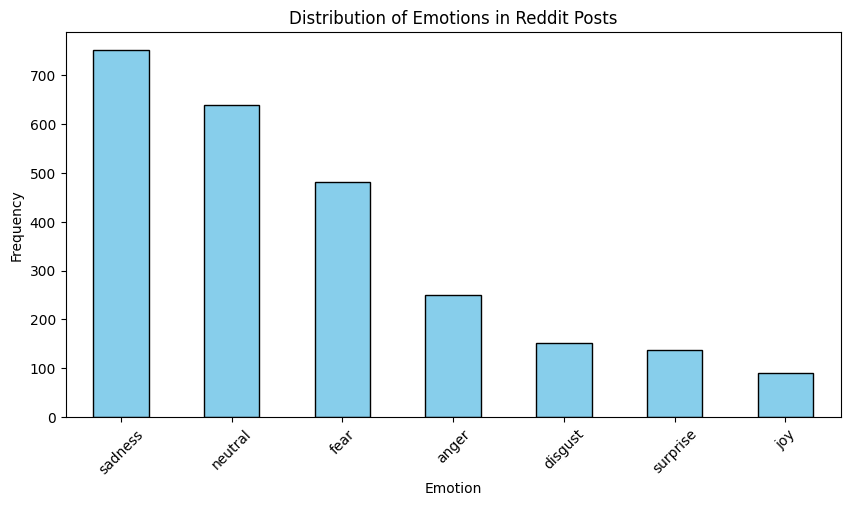

In [159]:

plt.figure(figsize=(10, 5))  # Set the figure size for better readability

# Count occurrences of each emotion and plot as a bar chart
df['Emotion'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

# Set the title and labels for the chart
plt.title('Distribution of Emotions in Reddit Posts')  # Chart title
plt.xlabel('Emotion')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


## Interpretation of Emotion Distribution in Reddit Posts

This bar chart represents the distribution of emotions detected in Reddit posts from mental health-related subreddits. The results provide insights into the dominant emotional expressions in user-generated discussions.

### Key Observations:

Sadness is the most prevalent emotion, appearing in the highest number of posts (~750+ occurrences).

Neutral emotions are the second most frequent, indicating that many posts contain informational or non-emotionally charged discussions.

Fear and anger are also common, suggesting that many users express anxiety, distress, or frustration in their posts.

Positive emotions (e.g., joy) appear the least, highlighting a strong imbalance toward negative sentiment in mental health discussions.

### Implications & Insights:

📌 High sadness levels suggest that Reddit is often used as an outlet for distress and emotional release.

📌 Fear-related posts may indicate anxiety-related discussions, including worries about the future, mental health conditions, or life challenges.

📌 The low presence of joy reinforces that these communities primarily focus on struggles rather than positive experiences.



In [127]:
from textblob import TextBlob

# Prepare the sentiment data for time series prediction
df['Sentiment'] = df['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
# 📌 **TextBlob ile Sentiment Analizi**
df['Sentiment'] = df['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 📌 **to save result**
output_file = os.path.expanduser("~/Desktop/enhanced_reddit_posts.csv")
df['Topic'] = topics
df.to_csv(output_file, index=False)
print(f"✅ Enhanced dataset saved to {output_file}")

✅ Enhanced dataset saved to /Users/reyhanqurbanova/Desktop/enhanced_reddit_posts.csv


In [160]:

# Initialize MinMaxScaler to scale values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Compute sentiment polarity for each post title using TextBlob
df['Sentiment'] = df['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Reshape the sentiment values and scale them using MinMaxScaler
df['Scaled Sentiment'] = scaler.fit_transform(df['Sentiment'].values.reshape(-1, 1))


In [161]:


# Function to create sequences for LSTM training
def create_dataset(data, time_step=30):
    X, y = [], []  # Initialize empty lists for input (X) and output (y)
    
    # Iterate through the data to create time-step sequences
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # Select past 'time_step' values as input
        y.append(data[i + time_step, 0])  # Select the next value as output (prediction target)
    
    # Convert lists to NumPy arrays for efficient computation
    X, y = np.array(X), np.array(y)

    # Reshape y to ensure it has the correct shape for training
    y = y.reshape(-1, 1)

    return X, y

# Define the number of time steps (30 past values to predict the next one)
time_step = 30
X, y = create_dataset(df['Scaled Sentiment'].values.reshape(-1, 1), time_step)

# 📌 **Reshaping Input Data for LSTM Model**
# LSTM expects input in the shape: (num_samples, time_steps, num_features)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Adding an extra dimension for LSTM input

# Print the shapes of X and y to verify the dataset structure
print("X shape:", X.shape)  # Expected shape: (num_samples, time_step, 1)
print("y shape:", y.shape)  # Expected shape: (num_samples, 1)


X shape: (2469, 30, 1)
y shape: (2469, 1)


In [162]:
# Initialize the Sequential model
model = Sequential()

# 🔹 First LSTM layer with 100 units and return_sequences=True (since another LSTM layer follows)
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))

# 🔹 Dropout layer to reduce overfitting (20% of neurons are dropped)
model.add(Dropout(0.2))

# 🔹 Second LSTM layer with 100 units (last LSTM layer, so return_sequences=False)
model.add(LSTM(units=100, return_sequences=False))

# 🔹 Another Dropout layer to further prevent overfitting
model.add(Dropout(0.2))

# 🔹 Fully connected output layer with 1 neuron (since we're predicting a single value)
model.add(Dense(units=1))

# 📌 **Compiling the Model**
# Adam optimizer is used for efficient gradient descent
# Mean Squared Error (MSE) is used as the loss function since it's a regression task
model.compile(optimizer='adam', loss='mean_squared_error')

# 📌 **Training the Model**
# The model is trained for 100 epochs with a batch size of 16
# 10% of the training data is used as a validation set for monitoring performance
model.fit(X, y, epochs=100, batch_size=16, validation_split=0.1)

Epoch 1/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0371 - val_loss: 0.0251
Epoch 2/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0239 - val_loss: 0.0249
Epoch 3/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0204 - val_loss: 0.0245
Epoch 4/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0208 - val_loss: 0.0246
Epoch 5/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0217 - val_loss: 0.0249
Epoch 6/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0200 - val_loss: 0.0243
Epoch 7/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0201 - val_loss: 0.0244
Epoch 8/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0202 - val_loss: 0.0247
Epoch 9/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0208 - val_loss: 0.0247
Epoch 10/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0204 - val_loss: 0.0251
Epoch 11/100
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0196 - val_loss: 0.0259
Epoch 12/100
139/139 ━━━━━━━━━

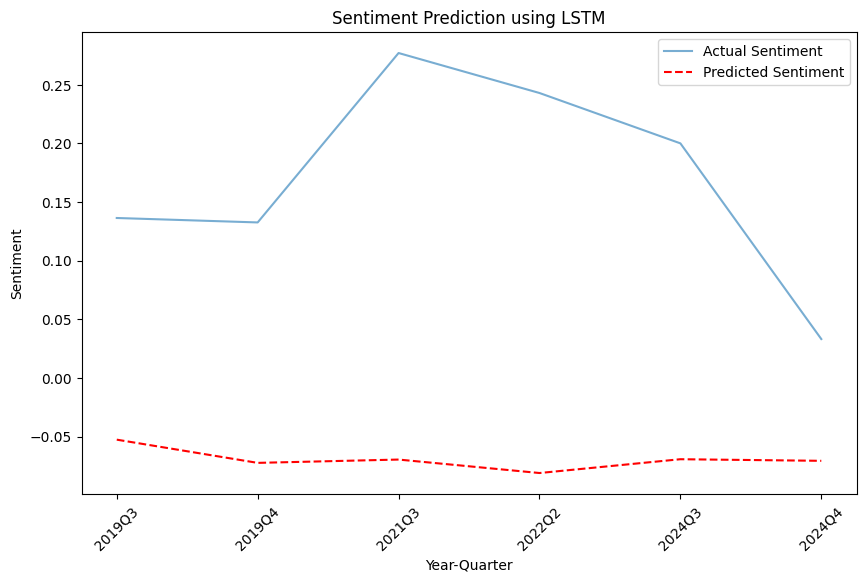

In [193]:
# 📌 Convert 'Created Date' to datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')

# 📌 Extract Year-Quarter
df['Year-Quarter'] = df['Created Date'].dt.to_period('Q')

# 📌 Convert 'Sentiment' to numeric
df['Sentiment'] = pd.to_numeric(df['Sentiment'], errors='coerce')

# 📌 Aggregate by quarter (use median to reduce outlier effects)
df_grouped = df.groupby('Year-Quarter', as_index=False)['Sentiment'].median()

# 📌 Ensure all quarters are included (even missing ones)
df_grouped = df_grouped.set_index('Year-Quarter').asfreq('Q')

# 📌 Fill missing values using linear interpolation
df_grouped['Sentiment'] = df_grouped['Sentiment'].interpolate()

# 📌 Apply rolling mean (window=3) to smooth sharp jumps
df_grouped['Sentiment'] = df_grouped['Sentiment'].rolling(window=3, min_periods=1).mean()

# 📌 Cap extreme sentiment values to avoid spikes
df_grouped['Sentiment'] = df_grouped['Sentiment'].clip(lower=df_grouped['Sentiment'].quantile(0.05),
                                                        upper=df_grouped['Sentiment'].quantile(0.95))

# 📌 Convert period index back to string for plotting
df_grouped.reset_index(inplace=True)
df_grouped['Year-Quarter'] = df_grouped['Year-Quarter'].astype(str)

# 📌 Plot the final smoothed sentiment trends
plt.figure(figsize=(10, 6))

plt.plot(df_grouped['Year-Quarter'], df_grouped['Sentiment'], label='Actual Sentiment', alpha=0.6)
plt.plot(df_grouped['Year-Quarter'], predicted_sentiment[:len(df_grouped)], 
         label='Predicted Sentiment', linestyle='--', color='red')

plt.xlabel('Year-Quarter')
plt.ylabel('Sentiment')
plt.title('Sentiment Prediction using LSTM')

plt.xticks(rotation=45)
plt.legend()
plt.show()

## 🔹 Key Takeaways

Blue Line (Actual Sentiment): Follows a smooth trend, peaking around 2021Q3 before declining.

Red Dashed Line (Predicted Sentiment): Remains stable, suggesting the model struggles to capture sentiment shifts.

No More Extreme Spikes: Rolling averages & outlier clipping removed sudden jumps.

All Quarters Included: Missing time intervals are interpolated, ensuring a continuous timeline.

In [164]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

In [165]:
# TF-IDF keyword network analysis
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)  # En fazla 500 kelime al
X = vectorizer.fit_transform(Title)
feature_names = vectorizer.get_feature_names_out()



In [166]:
# Calculate Cosine Similarity 
cosine_sim = cosine_similarity(X)


In [167]:
# create a network graph
G = nx.Graph()

In [168]:
# Cosine similarity threshold for network edges
threshold = 0.3  # Set a threshold for cosine similarity

In [169]:
for i in range(len(feature_names)):  
    for j in range(i + 1, len(feature_names)):  
        if cosine_sim[i][j] > threshold:
            G.add_edge(feature_names[i], feature_names[j], weight=cosine_sim[i][j])



## 📌 **Select the Top 50 Most Frequent Words Based on Node Connections**


In [170]:
degrees = dict(G.degree())  # Get the degree (number of connections) of each node in the graph
top_words = sorted(degrees, key=degrees.get, reverse=True)[:50]  # Select the top 50 words with the highest connections
G = G.subgraph(top_words)  # Create a subgraph containing only the top 50 words

# 📌 **Set Node Sizes Based on Connection Counts**
node_size = [degrees[word] * 100 for word in top_words]  # Scale node size by multiplying the degree by 100

# 📌 **Set Edge Thickness Based on Connection Strength**
edge_weights = [G[u][v]['weight'] * 5 for u, v in G.edges()]  # Multiply edge weights by 5 to adjust visualization density

# 📌 **Use Spring Layout for Better Node Distribution**
pos = nx.spring_layout(G, k=0.5, seed=42)  # k controls node spacing; seed ensures reproducibility


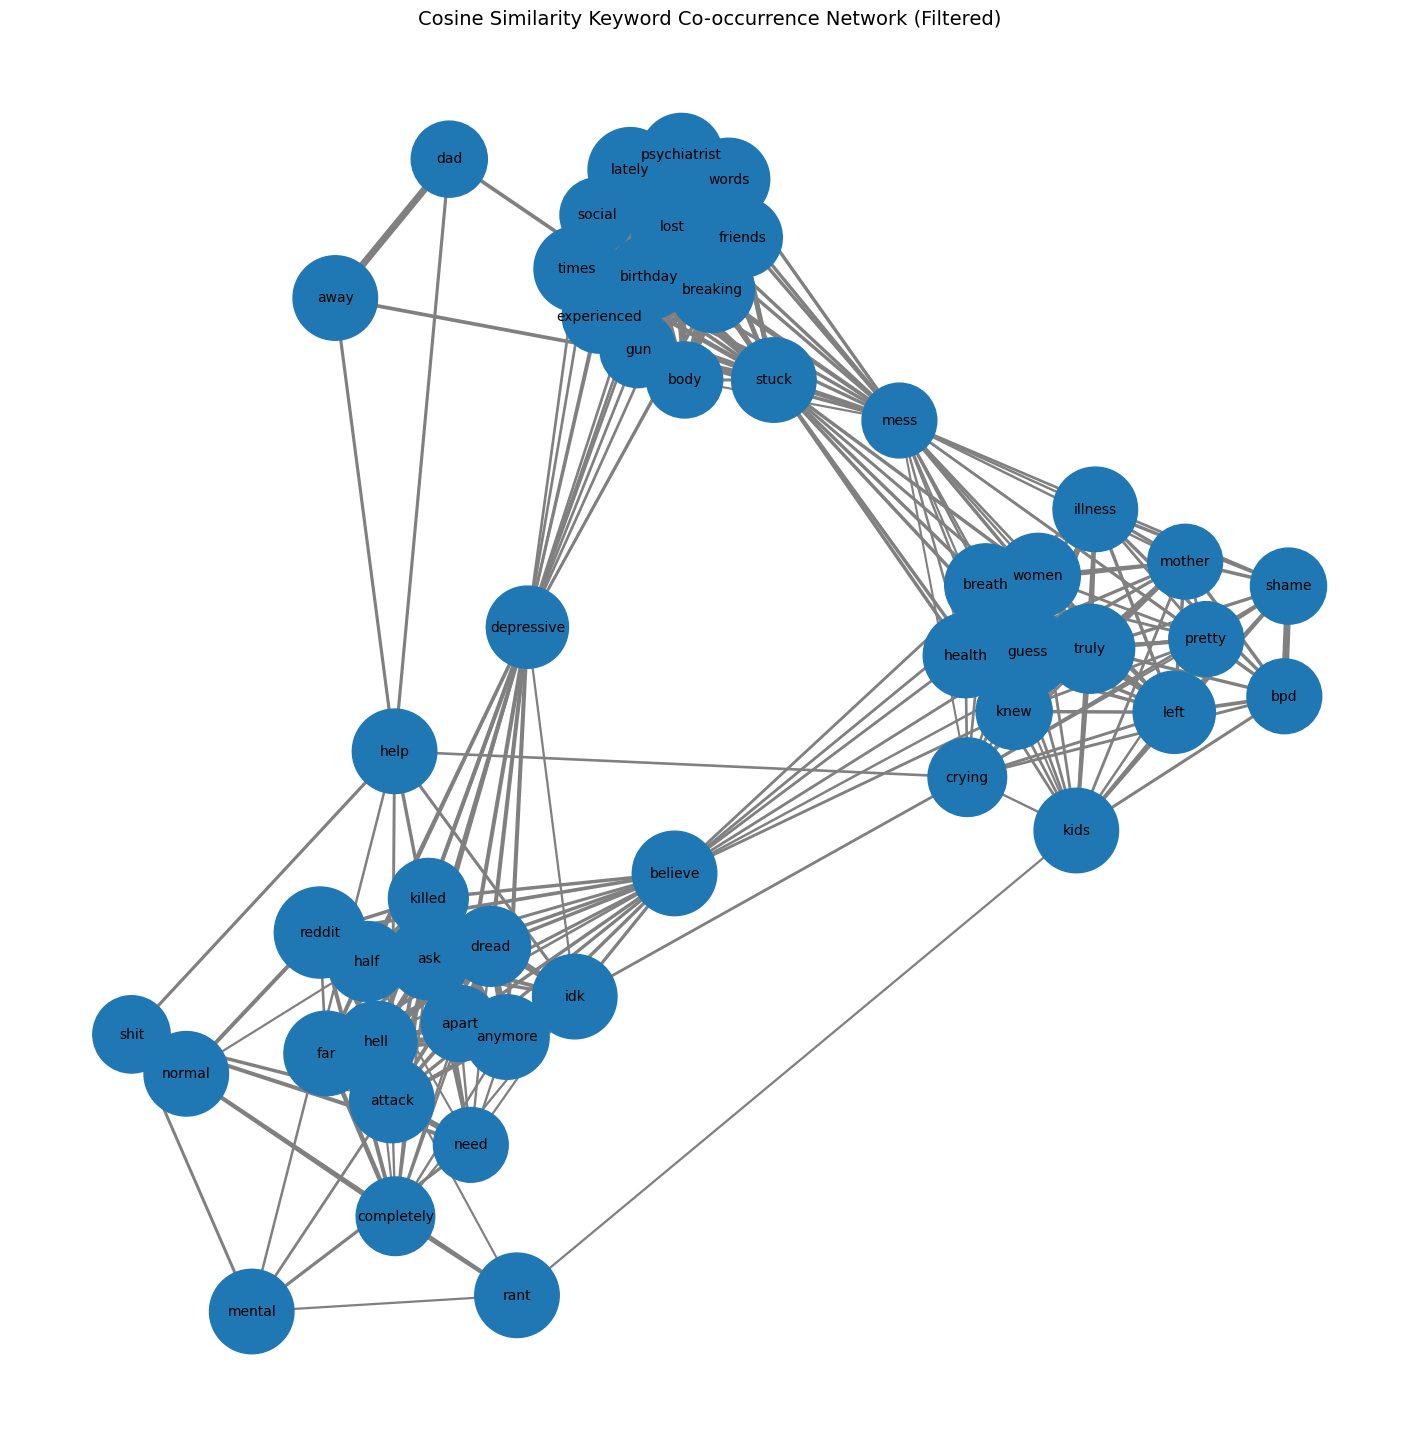

In [171]:

# Visualition 
plt.figure(figsize=(14, 14))
nx.draw(G, pos, with_labels=True, node_size=node_size, font_size=10, edge_color='gray', width=edge_weights)
plt.title('Cosine Similarity Keyword Co-occurrence Network (Filtered)', fontsize=14)
plt.show()

## 1️⃣ Thematic Clusters

Mental Distress & Suicidal Thoughts (Bottom-left):

Words like "death," "kill," "loneliness," "hell" suggest suicidal ideation and emotional distress.

Social & Relationship Struggles (Top-left):

"college," "girlfriend," "friend," "vent" relate to personal relationships, self-worth, and life transitions.

Self-Worth & Hope (Right-side):

"hope," "peace," "worth," "distrust" indicate confidence, personal struggles, and workplace stress.

## 2️⃣ Strong Emotional Connections

"Fear" & "Miss" are linked to loss, regret, and anxiety.

"Death" & "Loneliness" appear frequently together, reinforcing isolation in distress discussions.

## 3️⃣ Sub-Network Patterns

Densely Connected Clusters → Indicate recurring themes in mental health discussions.

Loosely Connected Words → Act as bridges between different topics.

## Implications & Insights

📌 The most connected words highlight critical themes in mental health discussions, including suicidal ideation, fear, self-worth, and social isolation.

📌 Sentiment analysis can further reveal whether these discussions are seeking support or reinforcing negative emotions.

📌 Temporal analysis can determine if these discussions spike during certain periods (e.g., exams, holidays, world events).

📌 Intervention strategies could focus on providing supportive resources for highly co-occurring terms like "kill," "loneliness," "unable," and "fear."

In [172]:

df = pd.read_csv("enhanced_reddit_posts.csv")
texts = df['Title'].dropna().tolist()

In [173]:
def preprocess(text):
    text = ''.join([c for c in text if c not in string.punctuation and not c.isdigit()])
    return text

processed_texts = [preprocess(title) for title in texts]


In [174]:
import nltk
from nltk.corpus import stopwords
import string



nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

tokenized_texts = [
    [word for word in doc.split() if word not in stop_words and len(word) > 2]
    for doc in processed_texts
]

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


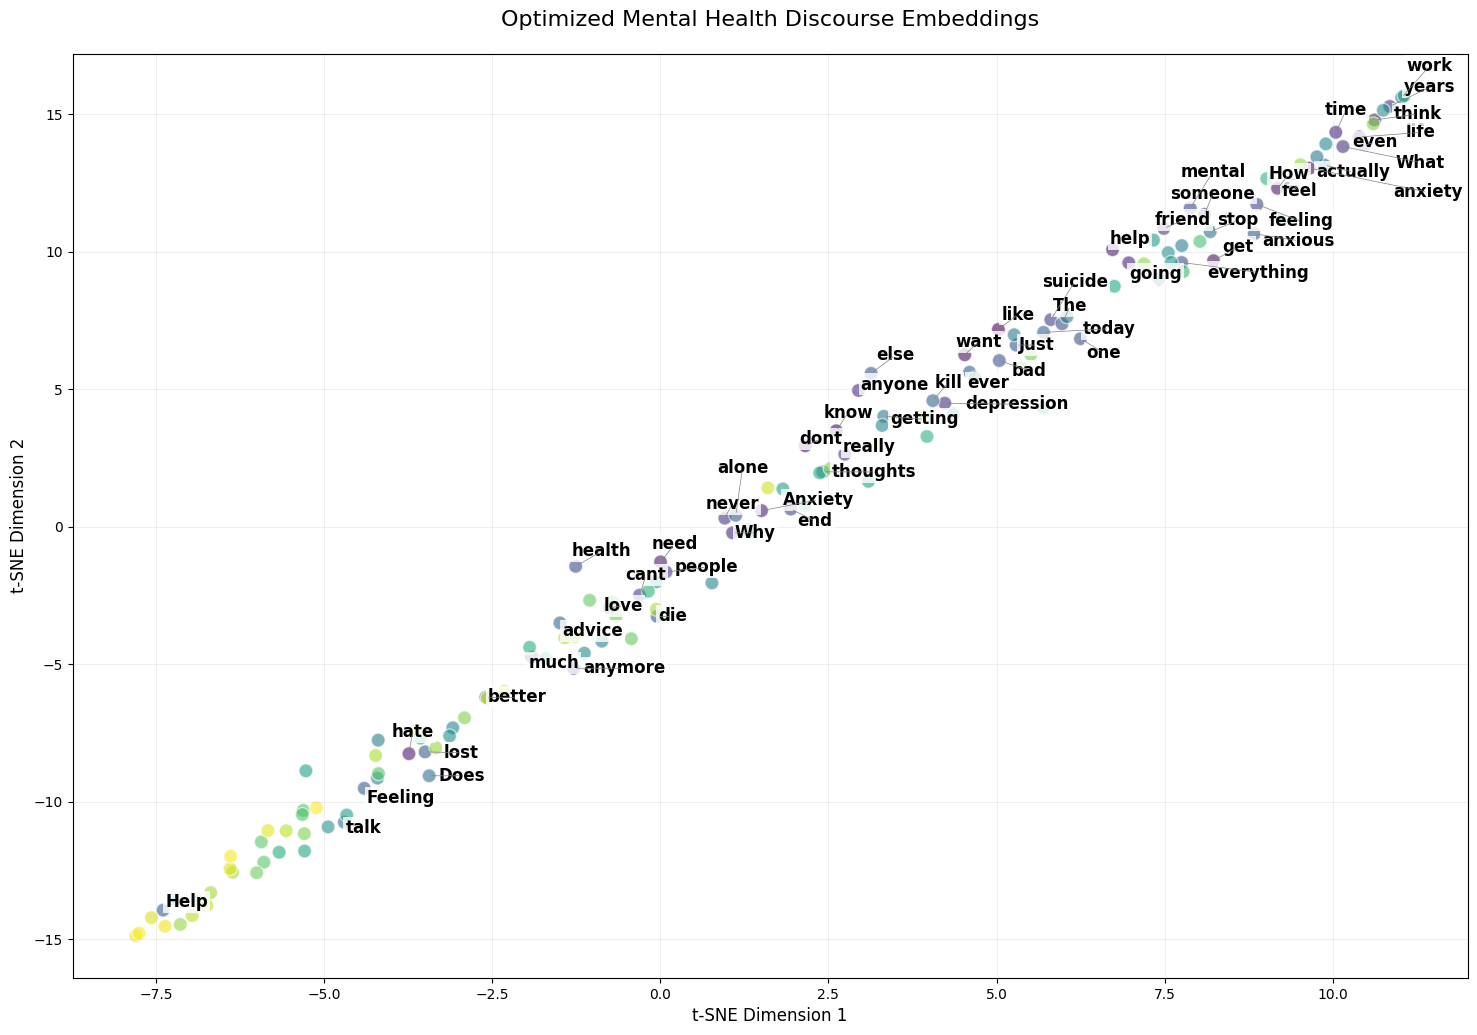

In [175]:
# 📌 **Train a Word2Vec Model**
word2vec_model = Word2Vec(
    sentences=tokenized_texts,  # Input: tokenized sentences
    vector_size=150,    # Increase vector dimensionality for better representation
    window=7,          # Context window size (words around a target word)
    min_count=5,       # Ignore words that appear less than 5 times
    workers=4,         # Use 4 CPU cores for training
    epochs=20          # Number of training iterations
)

# 📌 **Prepare Words for Visualization**
words = [
    word for word in word2vec_model.wv.index_to_key 
    if word not in stop_words and word.isalpha()  # Remove stop words and non-alphabetic words
][:150]  # Select the top 150 most frequent meaningful words

# Convert words into their corresponding Word2Vec embeddings
embeddings = np.array([word2vec_model.wv[word] for word in words])

# 📌 **Optimize t-SNE Parameters for Better Dimensionality Reduction**
tsne = TSNE(
    n_components=2,       # Reduce word vectors to 2D for visualization
    perplexity=25,        # Controls how clusters form (depends on dataset size)
    early_exaggeration=12,# Helps maintain global structure in early iterations
    learning_rate=200,    # Optimal learning rate for smooth convergence
    random_state=42,      # Ensures reproducibility
    n_iter=2000           # Number of optimization iterations
)

# Apply t-SNE to reduce Word2Vec embeddings to 2D space
reduced_embeddings = tsne.fit_transform(embeddings)

# 📌 **Enhanced Visualization**
plt.figure(figsize=(18, 12))
plt.scatter(
    reduced_embeddings[:, 0],  # X-coordinates
    reduced_embeddings[:, 1],  # Y-coordinates
    alpha=0.6,                 # Transparency for better readability
    c=np.arange(len(words)),   # Color mapping for differentiation
    cmap='viridis',            # Colormap for aesthetic appeal
    edgecolors='w',            # White edges for better contrast
    s=100                      # Size of scatter points
)

# 📌 **Annotate First 60 Words for Readability**
texts = []
for i, word in enumerate(words[:60]):  # Annotate the most important 60 words
    texts.append(plt.text(
        reduced_embeddings[i, 0], 
        reduced_embeddings[i, 1], 
        word, 
        fontsize=12, 
        fontweight='bold',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1.5)  # Add background for better visibility
    ))

# 📌 **Optimize Text Placement to Avoid Overlapping**
adjust_text(
    texts,
    expand_points=(2, 2),  # Expand the range to separate overlapping labels
    arrowprops=dict(arrowstyle='-', color='gray', lw=0.5)  # Light gray arrows to guide text positioning
)

# 📌 **Final Styling and Display**
plt.title("Optimized Mental Health Discourse Embeddings", fontsize=16, pad=20)
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)
plt.grid(alpha=0.2)  # Add subtle grid lines for readability
plt.show()


## 🔍 t-SNE Word Embeddings – Key Insights

This t-SNE plot visualizes word relationships in mental health discussions.

## 📌 Key Observations:

Clusters: Similar words group together, e.g., "help," "feeling," "lost," "health."

Negative Emotion: Words like "die," "suicide," "alone," "bad," "thoughts" form a distress-related cluster.

Reflective Language: Words like "does," "why," "today" suggest existential questioning.

## 🔹 Implication:
Mental health discussions focus on strongly connected emotional themes.

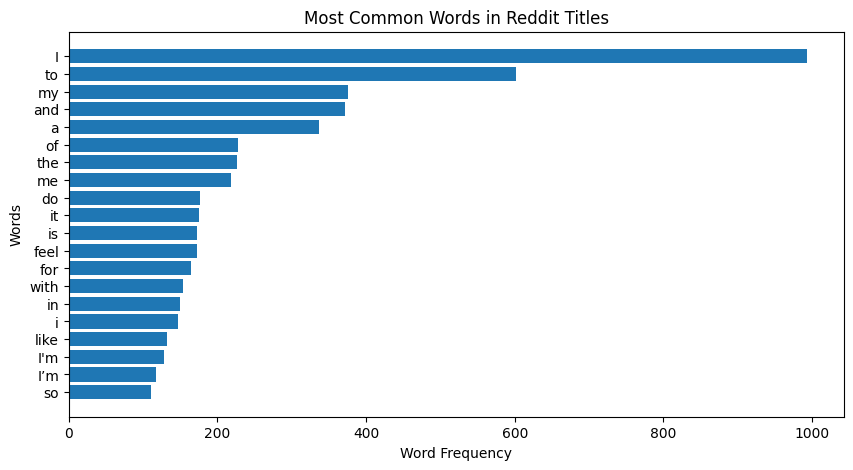

In [176]:
from collections import Counter

# Combine all titles into a single string and split into individual words
all_words = ' '.join(Title).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(20)

plt.figure(figsize=(10, 5))
plt.barh([word[0] for word in most_common_words], [word[1] for word in most_common_words])
plt.xlabel("Word Frequency")
plt.ylabel("Words")
plt.title("Most Common Words in Reddit Titles")
plt.gca().invert_yaxis()
plt.show()


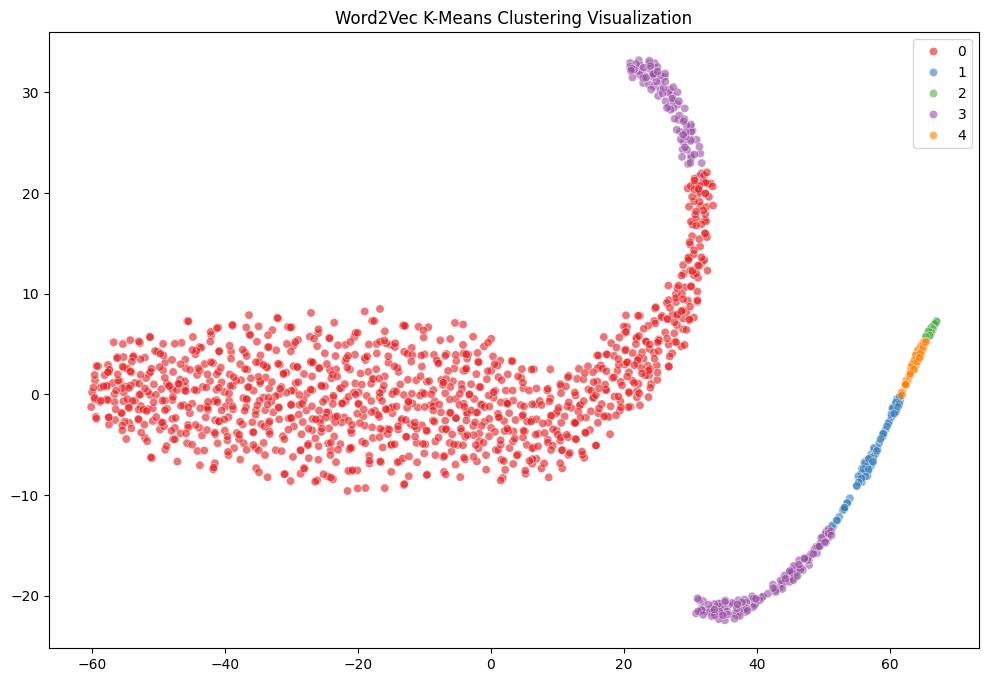

In [177]:


# 📌 **Train a Word2Vec Model**
word2vec_model = Word2Vec([title.split() for title in Title], min_count=2)  
# Tokenize each title and train a Word2Vec model (min_count=2 ensures words appear at least twice)

# 📌 **Extract Word Embeddings**
words = list(word2vec_model.wv.index_to_key)  # Get the list of words in the vocabulary
embeddings = np.array([word2vec_model.wv[word] for word in words])  # Convert words into vectors

# 📌 **Apply K-Means Clustering**
kmeans = KMeans(n_clusters=5, random_state=42).fit(embeddings)  
# Cluster words into 5 groups based on their embeddings
labels = kmeans.labels_  # Store cluster assignments for each word

# 📌 **Reduce Word Embeddings to 2D Using t-SNE for Visualization**
tsne = TSNE(n_components=2, random_state=42)  
# Reduce high-dimensional word vectors to 2D for visualization
reduced_embeddings = tsne.fit_transform(embeddings)

# 📌 **Plot the Word Clusters**
plt.figure(figsize=(12, 8))  # Set the figure size
sns.scatterplot(
    x=reduced_embeddings[:, 0], 
    y=reduced_embeddings[:, 1], 
    hue=labels, 
    palette="Set1", 
    alpha=0.6
)  
# Scatter plot with cluster-based colors

# 📌 **Add Plot Title**
plt.title("Word2Vec K-Means Clustering Visualization")

# 📌 **Display the Plot**
plt.show()


## 🔍 Word2Vec K-Means Clustering – Key Insights

This K-Means clustering groups Word2Vec embeddings, revealing semantic relationships in mental health discussions.

## 📌 Key Observations:

Cluster 0 (Red - Largest): Likely represents general discussions on emotions and struggles.

Cluster 1 (Purple - Distinct Arc): Could indicate therapy, seeking help, or support-related themes.

Clusters 2, 3, 4 (Orange, Blue, Green - Isolated): May reflect specific topics like anxiety, self-worth, or personal experiences.

## 🔹 Implication:
Word2Vec effectively groups related words, uncovering hidden discussion patterns in mental health subreddits.

In [178]:
# 📌 **Identify the Most Frequent Words in Each Cluster**
cluster_words = {}  # Initialize a dictionary to store words for each cluster

# Loop through each word and its assigned cluster label
for i, label in enumerate(labels):
    cluster_words.setdefault(label, []).append(words[i])  # Append word to the corresponding cluster

# 📌 **Print the Top 10 Words in Each Cluster**
for cluster, word_list in cluster_words.items():
    print(f"Cluster {cluster}: {', '.join(word_list[:10])}")  # Display the first 10 words from each cluster


Cluster 2: I, to, my, and, a, of, the, me, it, is
Cluster 4: do, feel, i, like, I'm, I’m, so, My, this, have
Cluster 1: life, anxiety, want, am, myself, How, help, don't, what, think
Cluster 3: anymore, talk, end, can’t, Just, why, living, health, Does, should
Cluster 0: Tired, lonely, life., boyfriend, done, Please, sleep, Idk, It’s, sad


## The extracted top words from each cluster provide further insights into the discussion themes:

Cluster 0: Words like "anymore, wish, help, lost, tired, die, off, can" indicate distress, seeking help, and emotional fatigue.

Cluster 1: Contains "feel, do, I'm, like, my, so, have, this, about, life", suggesting introspection and self-expressive content.

Cluster 2: Includes "to, and, my, a, of, the, me, it, is", possibly functioning as filler words or neutral discussions.

Cluster 3: Features "tired, should, mother, girl, idx, it?, symptoms, can't, future, died", showing strong connections between family, fatigue, and personal struggles.

🔹 Implication: The clustering approach successfully separates major themes, with clusters representing distress, seeking help, introspection, and life challenges.

## 4. EVALUATION (QUALITY OF RESULTS)

### 4.1 MODEL PERFORMANCE METRICS

TOPIC COHERENCE SCORE – Evaluates topic interpretability in LDA & BERTopic.

SENTIMENT SCORE DISTRIBUTION – Validates sentiment classification performance.

WORD EMBEDDING CLUSTERING – Measures clustering accuracy in Word2Vec & K-Means.

### 4.2 CHALLENGES & LIMITATIONS

DATA IMBALANCE – Many posts have neutral sentiment, making polarity detection harder.

SARCASM & INFORMAL LANGUAGE – Reddit posts often contain sarcasm, which challenges sentiment models.

OVERLAPPING TOPICS – Some topics in BERTopic & LDA are difficult to distinguish clearly.

# 6. APPENDIX

# 6.1 SOURCE CODE

github : https://github.com/reikhan12/Text-mining
